In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('diabetes.csv')

In [2]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = data.drop('class',axis = 1)
y = data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 42)

In [6]:
gbc = GradientBoostingClassifier(random_state = 42)

In [7]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 5, shuffle = True,random_state= 42)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50,100,150],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth':[3,4,5],
    'subsample':[0.8,1.0]
}
grid_search = GridSearchCV(estimator = gbc,
                           param_grid = param_grid,
                           cv=kfold,
                           scoring = 'recall',
                           n_jobs = -1,
                           verbose = 1)

In [9]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=1)

In [10]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}

In [11]:
grid_search.best_score_

0.6257575757575757

In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [13]:
confusion_matrix(y_test,y_pred)

array([[310,  95],
       [ 82, 128]], dtype=int64)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       405
           1       0.57      0.61      0.59       210

    accuracy                           0.71       615
   macro avg       0.68      0.69      0.68       615
weighted avg       0.72      0.71      0.71       615



In [15]:
best_model.feature_importances_

array([0.08968868, 0.26073071, 0.05878982, 0.05376621, 0.08816734,
       0.16270506, 0.17732721, 0.10882496])

In [16]:
features = pd.DataFrame(best_model.feature_importances_,index = data.iloc[:,:-1].columns,columns = ["Importances"])
df1 = features.sort_values(by = "Importances")

<Axes: xlabel='None', ylabel='Importances'>

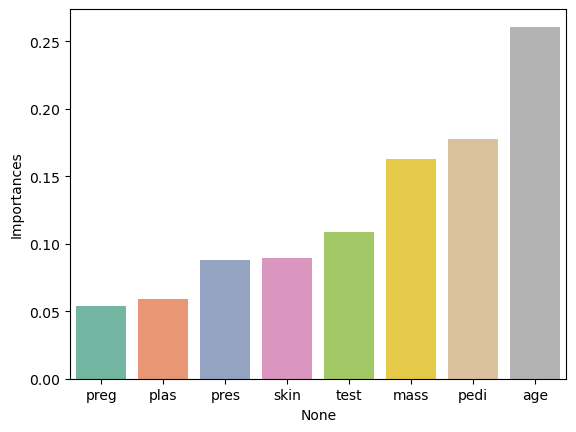

In [19]:
import seaborn as sns
sns.barplot(data = df1,x = features.index,y = "Importances",hue = features.index,palette = "Set2")